We import what will serve us

In [106]:
from pandas import DataFrame, read_csv
import bigml.api
from bigml.api import BigML
import pandas as pd
import matplotlib.pyplot as plt

from import_export_json import *

In [107]:
project = 'gmsc'
dossier_evaluations = './evaluations/'
version = 'v1.3'

In [108]:
comp_csv_suffix = version + '.csv.bz2'
csv_suffix = version + '.csv'
filename_evaluation = 'evaluation_gmsc_' + csv_suffix

In [109]:
project_data = json_load_project(project, version)


# We recover the importance of the fields for our ensemble

#### We connect to the bigml api

In [110]:
api = BigML(project=project_data['bigML_ressource']['project'])

#### We recover the ensemble that interests us

In [111]:
ensemble = api.get_ensemble(project_data['bigML_ressource']['models']['ensembles']['fields_test3']) 

#### We recover the importance of the fields

In [112]:
importances = ensemble['object']['importance']

In [113]:
importances

{'000001': 0.22253,
 '000002': 0.1077,
 '000003': 0.04916,
 '000004': 0.03075,
 '000005': 0.08225,
 '000006': 0.04279,
 '000007': 0.03575,
 '000008': 0.07585,
 '000009': 0.03177,
 '00000a': 0.07363,
 '00000b': 0.00097,
 '00000c': 0.00055,
 '00000d': 0.23174,
 '00000e': 0.01455}

#### We get the names of the fields

In [114]:
# refabriquer un dictionnaire avec les noms de colonnes (et non plus les n°)
importances_named = dict()
for column, importance in importances.items():
    column_name = ensemble['object']['ensemble']['fields'][column]['name']
    importances_named[column_name] = importance

importances_named

{'RevolvingUtilizationOfUnsecuredLines': 0.22253,
 'age': 0.1077,
 'DebtRatio': 0.04916,
 'MonthlyIncome': 0.03075,
 'MonthlyDebt': 0.08225,
 'DisposableIncome': 0.04279,
 'BalancedIncome': 0.03575,
 'NumberOfOpenCreditLinesAndLoans': 0.07585,
 'NumberRealEstateLoansOrLines': 0.03177,
 'NumberOfTime30-59DaysPastDueNotWorse': 0.07363,
 'NumberOfTime60-89DaysPastDueNotWorse': 0.00097,
 'NumberOfTimes90DaysLate': 0.00055,
 'WeightedOfLatePayment': 0.23174,
 'NumberOfDependents': 0.01455}

#### We display the histogram of the importance of the fields

Text(0.5, 0.98, 'Importance fields')

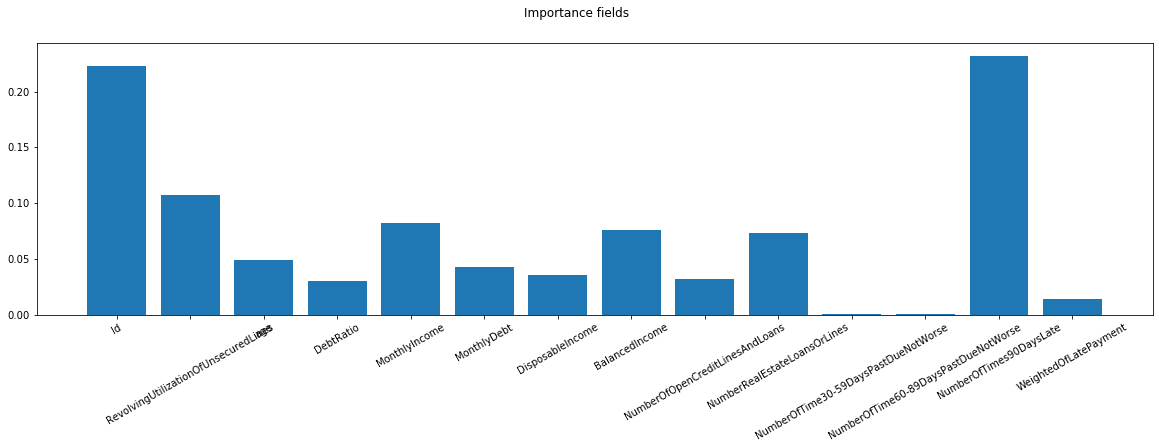

In [115]:
data = importances_named
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(20, 5), sharey=True)
axs.bar(names, values)

xtick_labels = ['Id','RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'MonthlyDebt', 'DisposableIncome', 'BalancedIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'WeightedOfLatePayment', 'NumberOfDependents', 'SeriousDlqin2yrs']
plt.xticks(names, xtick_labels, rotation=30)

fig.suptitle('Importance fields')

In [116]:
predictions_ensemble = read_csv(project_data['files']['predictions']['ensembles']['prediction3']['dossier']+project_data['files']['predictions']['ensembles']['prediction3']['file_name'], index_col=0)
predictions_ensemble.head(5)

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
Id,,,,,,,,,,,,,,,,,,,
59771,0.029690,57,0.283244,10121,2866.716755,7254.283245,10121.0,7,1,0,0,0,0,0,0,0,0.99350,0.99647,0.00353
21363,0.000000,57,0.142562,7750,1104.857438,6645.142563,7750.0,9,1,0,0,0,0,0,0,0,0.98623,0.99087,0.00914
127325,0.036569,48,0.236294,6000,1417.763706,4582.236294,1500.0,6,2,0,0,0,0,3,0,0,0.99180,0.99609,0.00392
140510,1.018331,41,0.163138,4958,808.836860,4149.163140,4958.0,4,0,0,0,0,0,0,0,0,0.89436,0.92451,0.07549
144298,1.008799,49,0.300000,0,3942.000000,0.000000,0.0,10,1,0,0,0,0,0,0,0,0.88784,0.91113,0.08887


In [117]:
predictions_ensemble.insert(13,"error",0)

predictions_ensemble.head(5)

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs,SeriousDlqin2yrs.1,confidence,0 probability,1 probability
Id,,,,,,,,,,,,,,,,,,,,
59771,0.029690,57,0.283244,10121,2866.716755,7254.283245,10121.0,7,1,0,0,0,0,0,0,0,0,0.99350,0.99647,0.00353
21363,0.000000,57,0.142562,7750,1104.857438,6645.142563,7750.0,9,1,0,0,0,0,0,0,0,0,0.98623,0.99087,0.00914
127325,0.036569,48,0.236294,6000,1417.763706,4582.236294,1500.0,6,2,0,0,0,0,0,3,0,0,0.99180,0.99609,0.00392
140510,1.018331,41,0.163138,4958,808.836860,4149.163140,4958.0,4,0,0,0,0,0,0,0,0,0,0.89436,0.92451,0.07549
144298,1.008799,49,0.300000,0,3942.000000,0.000000,0.0,10,1,0,0,0,0,0,0,0,0,0.88784,0.91113,0.08887


In [118]:
predictions_ensemble['SeriousDlqin2yrs']

Id
59771     0
21363     0
127325    0
140510    0
144298    0
96371     0
49743     0
47390     0
58379     0
69048     0
41981     1
88783     0
70772     0
20217     0
80725     0
96907     0
81422     0
109510    0
1877      0
46384     0
7488      1
18049     0
29282     0
51011     0
76505     0
134481    0
100165    0
25706     1
96399     0
33117     0
         ..
29540     0
99458     0
10672     0
5347      0
76960     0
116787    0
104459    0
102281    0
130379    0
25523     0
51288     0
146030    1
123570    0
147032    0
107511    0
89820     0
51191     0
149916    0
99066     0
53079     0
88110     0
70320     0
64984     0
16616     0
55540     0
30431     0
63245     0
104971    0
53961     0
49316     0
Name: SeriousDlqin2yrs, Length: 30000, dtype: int64

### we count the True Positive, True Negative, False Positive, False Negative of the different predictions

In [119]:
total_errors = {}

TP_lines = (predictions_ensemble['SeriousDlqin2yrs']==1) & (predictions_ensemble['SeriousDlqin2yrs.1']==1)
TN_lines = ~(predictions_ensemble['SeriousDlqin2yrs']==1) & ~(predictions_ensemble['SeriousDlqin2yrs.1']==1)
FP_lines = ~(predictions_ensemble['SeriousDlqin2yrs']==1) & (predictions_ensemble['SeriousDlqin2yrs.1']==1)
FN_lines = (predictions_ensemble['SeriousDlqin2yrs']==1) & ~(predictions_ensemble['SeriousDlqin2yrs.1']==1)

TP = len(predictions_ensemble.loc[TP_lines])
TN = len(predictions_ensemble.loc[TN_lines])
FP = len(predictions_ensemble.loc[FP_lines])
FN = len(predictions_ensemble.loc[FN_lines])

total_errors['TP'] = TP
total_errors['TN'] = TN
total_errors['FP'] = FP
total_errors['FN'] = FN
    
d = {'P\u0302': [TP, FP], 'N\u0302': [FN, TN]}
confusion_matrix = DataFrame(data=d,index=['P','N'])
confusion_matrix
    

,P̂,N̂
P,369,1587
N,252,27792


# Create Confusion Matrix

we charge our predictions

In [120]:

df_evaluation = predictions_ensemble


we load our predictions with the probability fields

### we rename our columns SeriousDlqin2yrs

In [121]:

df_evaluation.rename(columns = {list(df_evaluation)[15]:'SeriousDlqin2yrs_Actual'}, inplace=True)
df_evaluation.rename(columns = {list(df_evaluation)[16]:'SeriousDlqin2yrs_Predicted'}, inplace=True)
df_evaluation

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability
Id,,,,,,,,,,,,,,,,,,,,
59771,0.029690,57,0.283244,10121,2866.716755,7254.283245,10121.000000,7,1,0,0,0,0,0,0,0,0,0.99350,0.99647,0.00353
21363,0.000000,57,0.142562,7750,1104.857438,6645.142563,7750.000000,9,1,0,0,0,0,0,0,0,0,0.98623,0.99087,0.00914
127325,0.036569,48,0.236294,6000,1417.763706,4582.236294,1500.000000,6,2,0,0,0,0,0,3,0,0,0.99180,0.99609,0.00392
140510,1.018331,41,0.163138,4958,808.836860,4149.163140,4958.000000,4,0,0,0,0,0,0,0,0,0,0.89436,0.92451,0.07549
144298,1.008799,49,0.300000,0,3942.000000,0.000000,0.000000,10,1,0,0,0,0,0,0,0,0,0.88784,0.91113,0.08887
96371,0.798650,34,0.295274,8950,2642.704725,6307.295275,8950.000000,8,2,0,0,0,0,0,0,0,0,0.91985,0.94374,0.05626
49743,0.140158,67,0.300000,0,291.000000,0.000000,0.000000,6,0,0,0,0,0,0,0,0,0,0.99025,0.99381,0.00619
47390,0.045935,78,0.007199,5833,41.992799,5791.007201,2916.500000,11,0,0,0,0,0,0,1,0,0,0.99175,0.99455,0.00545
58379,0.301055,54,0.255097,8533,2176.744903,6356.255097,8533.000000,12,1,0,0,0,0,0,0,0,0,0.97615,0.98478,0.01522


In [122]:
# Display confusion matrix
confusion_matrix = pd.crosstab(df_evaluation['SeriousDlqin2yrs_Actual'], df_evaluation['SeriousDlqin2yrs_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted      0    1
Actual               
0          27792  252
1           1587  369


#### Create an error column

In [123]:
df_evaluation['Error'] = ""
df_evaluation.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,NumberOfTimes90DaysLate,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
Id,,,,,,,,,,,,,,,,,,,,,
59771,0.029690,57,0.283244,10121,2866.716755,7254.283245,10121.0,7,1,0,...,0,0,0,0,0,0,0.99350,0.99647,0.00353,
21363,0.000000,57,0.142562,7750,1104.857438,6645.142563,7750.0,9,1,0,...,0,0,0,0,0,0,0.98623,0.99087,0.00914,
127325,0.036569,48,0.236294,6000,1417.763706,4582.236294,1500.0,6,2,0,...,0,0,0,3,0,0,0.99180,0.99609,0.00392,
140510,1.018331,41,0.163138,4958,808.836860,4149.163140,4958.0,4,0,0,...,0,0,0,0,0,0,0.89436,0.92451,0.07549,
144298,1.008799,49,0.300000,0,3942.000000,0.000000,0.0,10,1,0,...,0,0,0,0,0,0,0.88784,0.91113,0.08887,


#### we define a function to fill the error column

In [124]:
def eval_error(row):
    actual = row['SeriousDlqin2yrs_Actual']
    predicted = row['SeriousDlqin2yrs_Predicted']
    if actual == 1 and actual == predicted:
        row['Error'] = "TP"
    elif actual == 1 and predicted == 0:
        row['Error'] = "FN"
    elif actual == 0 and predicted == 1:
        row['Error'] = "FP"
    else:
        row['Error'] = "TN"
        
    return row['Error']
        

In [125]:
df_evaluation['Error'] = df_evaluation.apply(eval_error, axis=1)
df_evaluation

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,NumberOfTimes90DaysLate,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
Id,,,,,,,,,,,,,,,,,,,,,
59771,0.029690,57,0.283244,10121,2866.716755,7254.283245,10121.000000,7,1,0,...,0,0,0,0,0,0,0.99350,0.99647,0.00353,TN
21363,0.000000,57,0.142562,7750,1104.857438,6645.142563,7750.000000,9,1,0,...,0,0,0,0,0,0,0.98623,0.99087,0.00914,TN
127325,0.036569,48,0.236294,6000,1417.763706,4582.236294,1500.000000,6,2,0,...,0,0,0,3,0,0,0.99180,0.99609,0.00392,TN
140510,1.018331,41,0.163138,4958,808.836860,4149.163140,4958.000000,4,0,0,...,0,0,0,0,0,0,0.89436,0.92451,0.07549,TN
144298,1.008799,49,0.300000,0,3942.000000,0.000000,0.000000,10,1,0,...,0,0,0,0,0,0,0.88784,0.91113,0.08887,TN
96371,0.798650,34,0.295274,8950,2642.704725,6307.295275,8950.000000,8,2,0,...,0,0,0,0,0,0,0.91985,0.94374,0.05626,TN
49743,0.140158,67,0.300000,0,291.000000,0.000000,0.000000,6,0,0,...,0,0,0,0,0,0,0.99025,0.99381,0.00619,TN
47390,0.045935,78,0.007199,5833,41.992799,5791.007201,2916.500000,11,0,0,...,0,0,0,1,0,0,0.99175,0.99455,0.00545,TN
58379,0.301055,54,0.255097,8533,2176.744903,6356.255097,8533.000000,12,1,0,...,0,0,0,0,0,0,0.97615,0.98478,0.01522,TN


#### We export our evaluation file in csv

In [126]:
df_evaluation.to_csv(dossier_evaluations+filename_evaluation)

#### we load our evaluation file and we count the values of the column of error

In [130]:
# print(df_evaluation[df_evaluation.Error == 'FN'].SeriousDlqin2yrs_Actual.sum())
df_evaluation.groupby(['Error']).Error.count()

Error
FN     1587
FP      252
TN    27792
TP      369
Name: Error, dtype: int64

In [129]:
# print(df_evaluation[df_evaluation.Error == 'FN'].SeriousDlqin2yrs_Actual.sum())
df_evaluation.Error.count()

30000

#### We create a DataFrame with our prediction errors (Negative False and Positive False)

In [131]:
FP_or_FN= (df_evaluation['Error'] == 'FN') |  (df_evaluation['Error'] == 'FP')
df_error = df_evaluation.loc[FP_or_FN]
df_error

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,NumberOfTimes90DaysLate,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error
Id,,,,,,,,,,,,,,,,,,,,,
41981,1.000000,55,0.132852,4982,661.867149,4320.132851,4982.000000,1,0,0,...,1,3,0,0,1,0,0.68245,0.71197,0.28803,FN
7488,0.419628,63,0.438756,10000,4387.561240,5612.438760,10000.000000,13,2,1,...,1,4,0,0,1,0,0.74142,0.77513,0.22487,FN
25706,0.147335,54,0.031626,3572,112.968376,3459.031624,1786.000000,8,0,0,...,0,0,0,1,1,0,0.97567,0.98375,0.01625,FN
49307,0.762409,39,0.529434,2700,1429.470566,1270.529434,540.000000,6,0,0,...,0,0,0,4,1,0,0.90674,0.93041,0.06959,FN
16603,0.979487,59,1.168944,3000,3506.831055,-506.831055,1500.000000,9,2,0,...,0,0,0,1,1,0,0.89342,0.91659,0.08341,FN
105029,1.000000,35,0.075275,7000,526.924727,6473.075273,1750.000000,1,0,0,...,2,8,0,3,1,0,0.45816,0.51780,0.48220,FN
4891,0.000000,60,0.292697,6750,1975.707302,4774.292699,6750.000000,5,1,3,...,1,10,0,0,1,0,0.46108,0.51617,0.48383,FN
57839,1.000000,47,0.757432,3800,2878.242569,921.757431,1266.666667,2,0,0,...,1,9,0,2,0,1,0.57420,0.38109,0.61891,FP
27965,0.761472,46,0.494570,5800,2868.505432,2931.494568,1933.333333,7,1,0,...,0,0,0,2,1,0,0.91911,0.94110,0.05890,FN


Create a probability column

In [132]:
df_error.insert(21,"Probability",0)
df_error.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
Id,,,,,,,,,,,,,,,,,,,,,
41981,1.000000,55,0.132852,4982,661.867149,4320.132851,4982.000000,1,0,0,...,3,0,0,1,0,0.68245,0.71197,0.28803,FN,0
7488,0.419628,63,0.438756,10000,4387.561240,5612.438760,10000.000000,13,2,1,...,4,0,0,1,0,0.74142,0.77513,0.22487,FN,0
25706,0.147335,54,0.031626,3572,112.968376,3459.031624,1786.000000,8,0,0,...,0,0,1,1,0,0.97567,0.98375,0.01625,FN,0
49307,0.762409,39,0.529434,2700,1429.470566,1270.529434,540.000000,6,0,0,...,0,0,4,1,0,0.90674,0.93041,0.06959,FN,0
16603,0.979487,59,1.168944,3000,3506.831055,-506.831055,1500.000000,9,2,0,...,0,0,1,1,0,0.89342,0.91659,0.08341,FN,0
105029,1.000000,35,0.075275,7000,526.924727,6473.075273,1750.000000,1,0,0,...,8,0,3,1,0,0.45816,0.51780,0.48220,FN,0
4891,0.000000,60,0.292697,6750,1975.707302,4774.292699,6750.000000,5,1,3,...,10,0,0,1,0,0.46108,0.51617,0.48383,FN,0
57839,1.000000,47,0.757432,3800,2878.242569,921.757431,1266.666667,2,0,0,...,9,0,2,0,1,0.57420,0.38109,0.61891,FP,0
27965,0.761472,46,0.494570,5800,2868.505432,2931.494568,1933.333333,7,1,0,...,0,0,2,1,0,0.91911,0.94110,0.05890,FN,0


#### We create a function to fill the column probability
* Using the value of "1 probability" for false positives
* Using the value of "0 probability" for false negatives

In [133]:
def add_proba(row):

    if row['Error'] == "FP":
        row['Probability'] = row['1 probability'] 
    else:
        row['Probability'] = row['0 probability'] 
    
    return row['Probability']
     

In [134]:
df_error['Probability'] = df_error.apply(add_proba, axis=1)
df_error

/opt/conda/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
Id,,,,,,,,,,,,,,,,,,,,,
41981,1.000000,55,0.132852,4982,661.867149,4320.132851,4982.000000,1,0,0,...,3,0,0,1,0,0.68245,0.71197,0.28803,FN,0.71197
7488,0.419628,63,0.438756,10000,4387.561240,5612.438760,10000.000000,13,2,1,...,4,0,0,1,0,0.74142,0.77513,0.22487,FN,0.77513
25706,0.147335,54,0.031626,3572,112.968376,3459.031624,1786.000000,8,0,0,...,0,0,1,1,0,0.97567,0.98375,0.01625,FN,0.98375
49307,0.762409,39,0.529434,2700,1429.470566,1270.529434,540.000000,6,0,0,...,0,0,4,1,0,0.90674,0.93041,0.06959,FN,0.93041
16603,0.979487,59,1.168944,3000,3506.831055,-506.831055,1500.000000,9,2,0,...,0,0,1,1,0,0.89342,0.91659,0.08341,FN,0.91659
105029,1.000000,35,0.075275,7000,526.924727,6473.075273,1750.000000,1,0,0,...,8,0,3,1,0,0.45816,0.51780,0.48220,FN,0.51780
4891,0.000000,60,0.292697,6750,1975.707302,4774.292699,6750.000000,5,1,3,...,10,0,0,1,0,0.46108,0.51617,0.48383,FN,0.51617
57839,1.000000,47,0.757432,3800,2878.242569,921.757431,1266.666667,2,0,0,...,9,0,2,0,1,0.57420,0.38109,0.61891,FP,0.61891
27965,0.761472,46,0.494570,5800,2868.505432,2931.494568,1933.333333,7,1,0,...,0,0,2,1,0,0.91911,0.94110,0.05890,FN,0.94110


In [135]:
df_error.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
Id,,,,,,,,,,,,,,,,,,,,,
41981,1.000000,55,0.132852,4982,661.867149,4320.132851,4982.0,1,0,0,...,3,0,0,1,0,0.68245,0.71197,0.28803,FN,0.71197
7488,0.419628,63,0.438756,10000,4387.561240,5612.438760,10000.0,13,2,1,...,4,0,0,1,0,0.74142,0.77513,0.22487,FN,0.77513
25706,0.147335,54,0.031626,3572,112.968376,3459.031624,1786.0,8,0,0,...,0,0,1,1,0,0.97567,0.98375,0.01625,FN,0.98375
49307,0.762409,39,0.529434,2700,1429.470566,1270.529434,540.0,6,0,0,...,0,0,4,1,0,0.90674,0.93041,0.06959,FN,0.93041
16603,0.979487,59,1.168944,3000,3506.831055,-506.831055,1500.0,9,2,0,...,0,0,1,1,0,0.89342,0.91659,0.08341,FN,0.91659


they are sorted in descending order

In [136]:
df_error.sort_values(by = 'Probability', ascending=False, inplace=True)
df_error

/opt/conda/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,MonthlyDebt,DisposableIncome,BalancedIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfTime30-59DaysPastDueNotWorse,...,WeightedOfLatePayment,error,NumberOfDependents,SeriousDlqin2yrs_Actual,SeriousDlqin2yrs_Predicted,confidence,0 probability,1 probability,Error,Probability
Id,,,,,,,,,,,,,,,,,,,,,
101066,0.025153,89,0.001680,8333,13.998323,8319.001677,8333.000000,3,0,0,...,0,0,0,1,0,0.99659,0.99792,0.00208,FN,0.99792
103375,0.053130,78,0.066343,617,40.933657,576.066343,617.000000,3,0,0,...,0,0,0,1,0,0.99646,0.99790,0.00210,FN,0.99790
146174,0.070084,58,0.203856,7416,1511.796140,5904.203860,7416.000000,3,1,0,...,0,0,0,1,0,0.99488,0.99726,0.00274,FN,0.99726
42123,0.000000,59,0.300000,0,1293.000000,0.000000,0.000000,2,1,0,...,0,0,0,1,0,0.99540,0.99724,0.00276,FN,0.99724
59785,0.052095,68,0.002678,5600,14.997321,5585.002679,5600.000000,5,0,0,...,0,0,0,1,0,0.99534,0.99717,0.00283,FN,0.99717
8826,0.048674,64,0.300000,0,2446.000000,0.000000,0.000000,4,2,0,...,0,0,0,1,0,0.99518,0.99703,0.00297,FN,0.99703
137301,0.273151,51,0.016456,17500,287.983552,17212.016447,8750.000000,7,0,0,...,0,0,1,1,0,0.98725,0.99686,0.00314,FN,0.99686
112689,0.054184,87,0.010998,5000,54.989000,4945.011000,2500.000000,7,0,0,...,0,0,1,1,0,0.99435,0.99658,0.00342,FN,0.99658
130921,0.097995,48,0.179691,6666,1197.820306,5468.179694,6666.000000,4,2,0,...,0,0,0,1,0,0.99281,0.99636,0.00364,FN,0.99636


We select the first 100

In [137]:
df_error_100 = df_error.head(100)
df_error_100.to_csv('100_biggest_errors.csv')

The costs are calculated

In [138]:
cout_fn = total_errors['FN'] *(-500)
cout_fp = total_errors['FP'] * ( -2500)
cout_tn = total_errors['TN'] * 500
cout_tp = total_errors['TP'] * 0

print('FN :',cout_fn) 
print('FP :',cout_fp) 
print('TN :',cout_tn)
print('TP :',cout_tp)

FN : -793500
FP : -630000
TN : 13896000
TP : 0


In [139]:
gain = cout_fn + cout_fp + cout_tn + cout_tp
gain

12472500

#### We create the cost calculation function

In [143]:
def cost_threshold(threshold):
    prediction_threshold = df_evaluation['1 probability'] > threshold

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df_evaluation['SeriousDlqin2yrs_Actual'] == 1)
    N_real = (df_evaluation['SeriousDlqin2yrs_Actual'] == 0)

    TP = len(df_evaluation.loc[P_pred & P_real])
    TN = len(df_evaluation.loc[N_pred & N_real])
    FP = len(df_evaluation.loc[P_pred & N_real])
    FN = len(df_evaluation.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost

    return cost

#### We create the graph

<function matplotlib.pyplot.show(*args, **kw)>

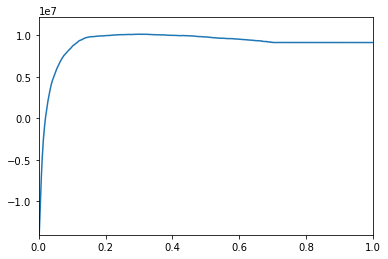

In [145]:
table = [cost_threshold(n/3000) for n in range(0,3000)]
threshold = [n/3000 for n in range(0,3000)]
plt.axis([0, 1,min(table),1.2*max(table)])
plt.plot(threshold, table)
plt.show

In [146]:
max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu en {max_threshold}')

Le gain maximum est 10135500 et il est obtenu en 0.29533333333333334


##### we calculate the positives and negatives

In [147]:
positive = (df_evaluation['SeriousDlqin2yrs_Actual'] == 1)
nb_positive=len(df_evaluation.loc[positive])
nb_negative=len(df_evaluation.loc[~positive])

##### we calculate the AUC 
* we classe the column
* we calculate the AUc in a loop

In [148]:
result = df_evaluation[['SeriousDlqin2yrs_Actual','1 probability']]
threshold_list = result.sort_values(by='1 probability',ascending=False)['SeriousDlqin2yrs_Actual'].values

auc = 0
P_cumul = 0
for i in range(len(threshold_list)):
    if threshold_list[i] == 1:
        P_cumul += 1
    else:
        auc += P_cumul
        
auc = auc/(nb_positive*nb_negative)

In [149]:
print(f'AUC={auc}')

AUC=0.8611779247568603


In [150]:

# Tri des données pour préparer le calcul de AUC
df4_sorted = df_evaluation.sort_values('1 probability', ascending=False)

#  Calcul de la somme des négatifs en dessous de chaque positifs (1 probability est inférieur)
N_sum_below = 0
for index in range(len(df4_sorted)):
    if df4_sorted['SeriousDlqin2yrs_Actual'].iloc[index] == 1:
        N_sum_below += df4_sorted['SeriousDlqin2yrs_Actual'][index+1:].value_counts().loc[0]

print(N_sum_below)

# Calcul du produit nombre N * nombre P
N_number = df4_sorted['SeriousDlqin2yrs_Actual'].value_counts().loc[0]
P_number  = df4_sorted['SeriousDlqin2yrs_Actual'].value_counts().loc[1]
NP_product = N_number * P_number

# Calcul auc
AUC = N_sum_below / NP_product
AUC

47239109


0.8611779247568603

# Sur les 100 plus grosse erreurs

   * 100% n'ont aucuns jours de retard 
   * 75% on plus de 6 NumberOfOpenCreditLinesAndLoans
   * environ 80% ont plus de 40 ans
   * environ 60% ont plus de 50 ans 

   * 20% avait 0 en MontlyIncome et ont été corrigé à 0.3 en DebtRatio
      * Avec eux 50% sont audessus de 0.3 en DebtRatio

Maud SONET